# Importation  des bibliothèques nécessaires

Avant de travailler avec des bibliothèques comme Pandas ou Numpy, il faut les importer ; et avant même cette étape, il faut installer ces bibliothèques. Si ce n’est pas encore fait sur votre machine. Une fois que c’est fait, nous pouvons les importer :

In [5]:
import pandas as pd
import numpy as np
#import matplotlib.p
import datetime
import pylab as P

# Importation  des données

Le jeu de données est accessible au format CSV. Cela tombe bien, puisque Pandas permet de lire des données :

In [6]:
cities=pd.read_csv('cities.csv', sep=',', index_col=0)
ticket_data=pd.read_csv('ticket_data.csv', sep=',',index_col=0)
stations=pd.read_csv('stations.csv', sep=',', index_col=0)
providers=pd.read_csv('providers.csv', sep=',', index_col=0)

Nous disposons maintenant des données importées dans un objet de type DataFrame — en gros un tableau ou une table — que nous avons appelé “cities,ticket_data,stations,providers” et sur lesquels nous allons pouvoir commencer à travailler. Nous avons affichier que ticket_data.

In [7]:
#cities.head(10)
ticket_data.head(10)
#stations.head(18)
#providers.head(10)

,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
id,,,,,,,,,,,
6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
6795030,8385,NaN,NaN,2017-10-06 05:30:00+00,2017-10-06 08:30:00+00,1800,2017-10-01 01:03:18.948+00,NaN,NaN,628,453
6795031,8385,NaN,NaN,2017-10-06 07:00:42+00,2017-10-06 09:30:42+00,2150,2017-10-01 01:03:18.948+00,NaN,NaN,628,453
6795032,8385,NaN,NaN,2017-10-06 07:10:00+00,2017-10-06 09:40:00+00,1700,2017-10-01 01:03:18.948+00,NaN,NaN,628,453
6795033,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,1700,2017-10-01 01:03:18.948+00,NaN,NaN,628,453


# Exploration rapide des jeux de données

Ici nous allons affichier les noms des colonnes de nos DataFrame.

In [8]:
cities.columns

Index(['local_name', 'unique_name', 'latitude', 'longitude', 'population'], dtype='object')

In [9]:
stations.columns

Index(['unique_name', 'latitude', 'longitude'], dtype='object')

In [10]:
ticket_data.columns

Index(['company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts',
       'price_in_cents', 'search_ts', 'middle_stations', 'other_companies',
       'o_city', 'd_city'],
      dtype='object')

In [11]:
providers.columns

Index(['company_id', 'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug',
       'has_adjustable_seats', 'has_bicycle', 'transport_type'],
      dtype='object')

# Nous allons extraire les infos intéressantes tels que type prix min, moyen et max, durée min/max/moyenne par trajet

##   Prix min, moyen et max

Pour ce faire nous allons l'histogramme des prix puis faire le resumer du données ticket_data pour voir les information tels que prix min , moyen et max.

<AxesSubplot:>

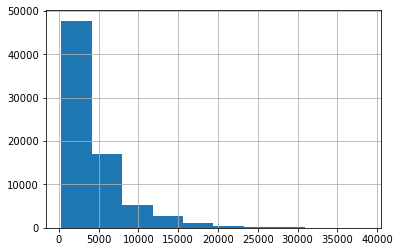

In [12]:
ticket_data["price_in_cents"].hist()

In [25]:
prix_desc=ticket_data.describe()["price_in_cents"]

In [26]:
print(prix_desc)

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64


## Durée min/max/moyenne par trajet

Pour ce faire nous allons créer une colonne appeler duration (le durée du trajet) puis recuperer les informations tels que la durée min/max/moyen par trajet.

In [19]:
ticket_data1=pd.read_csv('ticket_data.csv', sep=',', index_col=0,
                         parse_dates = ['departure_ts','arrival_ts'])
ticket_data1['departure_ts'] = pd.to_datetime(ticket_data1['departure_ts'],format = "%Y-%m-%d %H:%M:%S")
ticket_data1.iloc[2]

company                                  8377
o_station                                5905
d_station                                6495
departure_ts        2017-10-13 13:27:00+00:00
arrival_ts          2017-10-14 21:24:00+00:00
price_in_cents                           7400
search_ts          2017-10-01 00:13:40.212+00
middle_stations           {798,798,6794,6246}
other_companies                   {8377,8376}
o_city                                    611
d_city                                    542
Name: 6795027, dtype: object

In [20]:
# # Create a duration column
ticket_data1['Duration'] = ticket_data1['arrival_ts'] - ticket_data1['departure_ts']
# affichage des données
ticket_data.head()

,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
id,,,,,,,,,,,
6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [23]:
duree_desc=ticket_data1.describe()['Duration']
print(duree_desc)

count                        74168
mean     0 days 07:04:37.247600043
std      0 days 09:54:58.881351022
min                0 days 00:20:00
25%                0 days 03:00:00
50%                0 days 04:50:00
75%                0 days 08:00:00
max               20 days 12:51:00
Name: Duration, dtype: object


On voit bien que la durée min est égale à $20$ minutes,  max  est égale à $20$ jours et $12$ heure $51$ minutes

# Différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km)

## Différence de prix moyen et durée selon le train